In [25]:
import numpy as np
import reconstruction
import trimesh
import os
import sys
from reconstruction.utils import binvox_rw
#import reconstruction.utils.plot
#import importlib; importlib.reload(reconstruction.utils.plot)
#from reconstruction.utils.plot import plot_vol
from reconstruction.utils.data_prep import get_fractured

np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [2]:
import matplotlib.pyplot as plt

In [20]:
data = np.load('./jaron.npy')
fractured = get_fractured(data)

In [31]:
def check_fix_file(file):
    with open(file) as f:
        l1 = f.readline()
        l2 = f.readlines()

    if l1 != 'OFF\n' and l1[:3] == 'OFF':
        out = 'OFF\n'
        out += l1.split('OFF')[1]
        out += ''.join(l2)
        with open(file, 'w') as f:
            f.write(out)

def voxels_from_file(file, voxsize):
    cmd = f'C:/Users/yeide/Desktop/TF_ML/3D-ORGAN-ML-TF-main/tools/binvox/binvox.exe -d {voxsize} -cb -e {file}' #tools/bonvox/bonvox.exe
    check_fix_file(file)
    out_file = file.split('.')[0] + '.binvox'
            
    if os.path.exists(out_file):
        os.remove(out_file)
    #print(cmd)
    t = os.system(cmd)
    #print(voxsize, file)
    #print(out_file, t)
    
    if t == 0:
        with open(out_file, 'rb') as f:
            d = binvox_rw.read_as_3d_array(f).data
            d = np.array(d)
        os.remove(out_file)
        return 1, d
    else:
        return 0, None
    

In [42]:
def voxels_to_stl(voxelo):
    mesh = trimesh.voxel.ops.matrix_to_marching_cubes(
        matrix=voxelo,
        pitch=1.0)
    mesh.merge_vertices()
    mesh.remove_duplicate_faces()
    mesh.apply_scale(scaling=1.0)
    trimesh.repair.fill_holes(mesh)
    trimesh.repair.fix_inversion(mesh)
    trimesh.repair.fix_winding(mesh)
    trimesh.exchange.export.export_mesh(
        mesh=mesh,
        file_obj="./mesh.stl",
        file_type="stl"
    )

In [26]:
jaron = 'C:/Users/yeide/Desktop/TF_ML/3D-ORGAN-ML-TF-main/jaron.off'

In [27]:
jaronvoxel = voxels_from_file(jaron,32)[1]

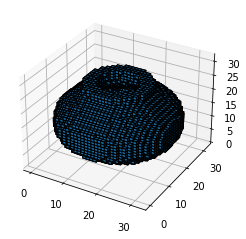

In [28]:
#jarron con piezas faltantes, usado el proceso get_fracturated
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect('auto')

ax.voxels(jaronvoxel, edgecolor="k")

plt.show()

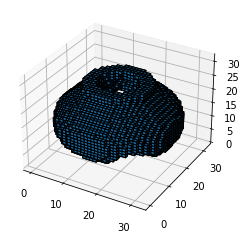

In [29]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect('auto')

ax.voxels(data, edgecolor="k")

plt.show()

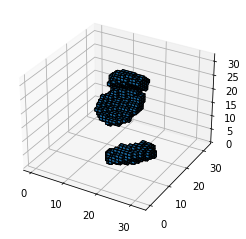

In [30]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect('auto')
#Guardemos esto por si no logramos hacer que guarde el producto
testeo = np.subtract(jaronvoxel, data, dtype=np.float32)
ax.voxels(testeo, edgecolor="k")

plt.show()

In [43]:
voxels_to_stl(testeo)